# Import data 

In [84]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Load the CSV file(s) as reviews.
GA_data = pd.read_csv("new_GA_clean.csv")

# View the DataFrame.
GA_data.head()

,Unnamed: 0,Location,Audience,Campaign,Date,Platform,Ad_Format,Creative_Family,Creative_Version,Total_Sessions,Days_Max_Date,Latest_Report
0,0,Ashburn,6,FY23_change_digital_phase3,2022-08-08,Trade Media,Inside_mortgage_finance_newsletter,CloserTwins,RTB,1,84,0
1,1,Mebane,4,FY23_broker_campaign,2022-06-16,User ID Display,NaN,UnfairAdvantage,OnePage,1,137,0
2,2,Chicago,2,FY23_broker_campaign,2022-06-05,Domain Display,Single image,UnfairAdvantage,NoDTI,2,148,0
3,3,South Jordan,1,FY23_broker_campaign,2022-09-02,User ID Display,NaN,CloserTwins,MoreLoansAll,1,59,0
4,4,Potsdam,4,FY23_broker_campaign,2022-10-30,Domain Display,NaN,UnfairAdvantage,1099,1,1,1


In [86]:
GA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47530 entries, 0 to 47529
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47530 non-null  int64 
 1   Location          47528 non-null  object
 2   Audience          47530 non-null  int64 
 3   Campaign          47528 non-null  object
 4   Date              47528 non-null  object
 5   Platform          47527 non-null  object
 6   Ad_Format         29518 non-null  object
 7   Creative_Family   47528 non-null  object
 8   Creative_Version  47528 non-null  object
 9   Total_Sessions    47530 non-null  int64 
 10  Days_Max_Date     47530 non-null  int64 
 11  Latest_Report     47530 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.4+ MB


## Changing audience type

Rename audience in lines with target groups

- Audience 1, 2, 3 = Target Group 1
- Audience 4, 5 = Target Group 2
- Audience 6 = Target Group 3

In [87]:
# Use rename to rename target groups
GA_data = GA_data.rename(columns={"Audience": "Target_Groups"})

In [88]:
# Convert to string
GA_data['Target_Groups'] = GA_data['Target_Groups'].apply(str)

GA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47530 entries, 0 to 47529
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47530 non-null  int64 
 1   Location          47528 non-null  object
 2   Target_Groups     47530 non-null  object
 3   Campaign          47528 non-null  object
 4   Date              47528 non-null  object
 5   Platform          47527 non-null  object
 6   Ad_Format         29518 non-null  object
 7   Creative_Family   47528 non-null  object
 8   Creative_Version  47528 non-null  object
 9   Total_Sessions    47530 non-null  int64 
 10  Days_Max_Date     47530 non-null  int64 
 11  Latest_Report     47530 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.4+ MB


In [89]:
# Replace Audience 1,2,3 with Target Group 1
GA_data['Target_Groups'] = GA_data['Target_Groups'].replace(['1', '2', '3'], '1')

# Replace Audience 4,5 with Target Group 2
GA_data['Target_Groups'] = GA_data['Target_Groups'].replace(['4', '5'], '2')

# Replace Audience 6 with Target Group 3
GA_data['Target_Groups'] = GA_data['Target_Groups'].replace(['6'], '3')

# Sense check data 
GA_data.head()

,Unnamed: 0,Location,Target_Groups,Campaign,Date,Platform,Ad_Format,Creative_Family,Creative_Version,Total_Sessions,Days_Max_Date,Latest_Report
0,0,Ashburn,3,FY23_change_digital_phase3,2022-08-08,Trade Media,Inside_mortgage_finance_newsletter,CloserTwins,RTB,1,84,0
1,1,Mebane,2,FY23_broker_campaign,2022-06-16,User ID Display,NaN,UnfairAdvantage,OnePage,1,137,0
2,2,Chicago,1,FY23_broker_campaign,2022-06-05,Domain Display,Single image,UnfairAdvantage,NoDTI,2,148,0
3,3,South Jordan,1,FY23_broker_campaign,2022-09-02,User ID Display,NaN,CloserTwins,MoreLoansAll,1,59,0
4,4,Potsdam,2,FY23_broker_campaign,2022-10-30,Domain Display,NaN,UnfairAdvantage,1099,1,1,1


In [90]:
# Change to desired data type
GA_data['Target_Groups'] = pd.to_numeric(GA_data['Target_Groups'])

GA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47530 entries, 0 to 47529
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47530 non-null  int64 
 1   Location          47528 non-null  object
 2   Target_Groups     47530 non-null  int64 
 3   Campaign          47528 non-null  object
 4   Date              47528 non-null  object
 5   Platform          47527 non-null  object
 6   Ad_Format         29518 non-null  object
 7   Creative_Family   47528 non-null  object
 8   Creative_Version  47528 non-null  object
 9   Total_Sessions    47530 non-null  int64 
 10  Days_Max_Date     47530 non-null  int64 
 11  Latest_Report     47530 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.4+ MB


## Looking at the most popular location

In [91]:
# Use groupby() to group the sum of the count of appointments with locations
# Sort the results
# Sense check the data frame
most_popular_location = GA_data["Location"].value_counts()
most_popular_location

most_popular_location_20 = GA_data["Location"].value_counts()[:20]
most_popular_location_20

most_popular_location_20_df = GA_data["Location"].value_counts()[:20].rename_axis('Locations').reset_index(name='counts')

most_popular_location_20_df

,Locations,counts
0,Columbus,2014
1,Los Angeles,1675
2,New York,1229
3,Chicago,720
4,Mebane,634
5,Anaheim,545
6,Phoenix,504
7,Dallas,494
8,San Diego,488
9,Oklahoma City,484


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Columbus '),
  Text(1, 0, 'Los Angeles '),
  Text(2, 0, 'New York '),
  Text(3, 0, 'Chicago '),
  Text(4, 0, 'Mebane '),
  Text(5, 0, 'Anaheim '),
  Text(6, 0, 'Phoenix '),
  Text(7, 0, 'Dallas '),
  Text(8, 0, 'San Diego '),
  Text(9, 0, 'Oklahoma City '),
  Text(10, 0, 'Atlanta '),
  Text(11, 0, 'Irvine '),
  Text(12, 0, 'Coffeyville '),
  Text(13, 0, 'Houston '),
  Text(14, 0, 'Ashburn '),
  Text(15, 0, 'Las Vegas '),
  Text(16, 0, 'San Jose '),
  Text(17, 0, 'Miami '),
  Text(18, 0, 'Orange '),
  Text(19, 0, 'Philadelphia ')])

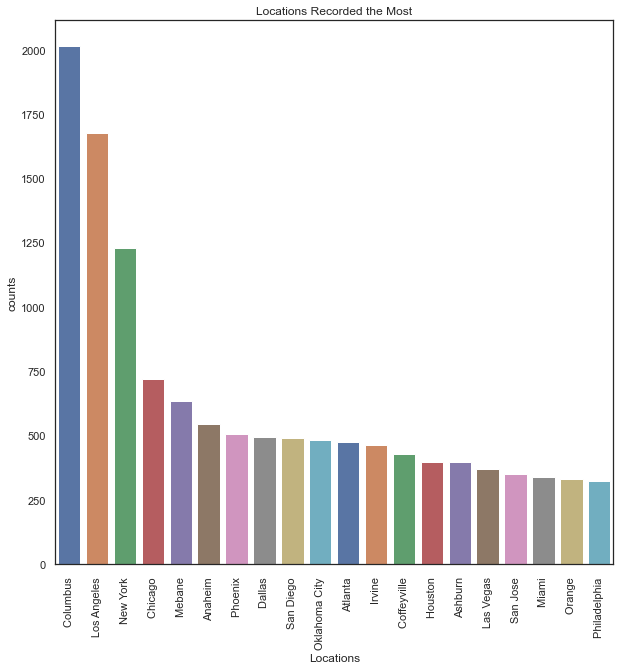

In [92]:
# Create a bar plot from the previous data set 
sns.barplot(
    data=most_popular_location_20_df,
    x="Locations",
    y="counts",
    palette="deep",).set(title="Locations Recorded the Most")
                    
sns.set_style("white")
plt.xticks(rotation=90)

Here we see an overview of the locations with the highest counts on the data set

## Looking at audience demographics

### Most Popular Audience Type 

In [93]:
# Use group by to see ditrbution of target group for the total number of sessions
target_group_distribution = (
    GA_data.groupby(["Target_Groups"])[["Total_Sessions"]]
    .agg("sum")
    .reset_index()
)

target_group_distribution

,Target_Groups,Total_Sessions
0,0,522
1,1,11686
2,2,30291
3,3,17385


In [94]:
# Remove 0 values
tgd_clean = target_group_distribution.tail(-1)
tgd_clean

,Target_Groups,Total_Sessions
1,1,11686
2,2,30291
3,3,17385


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

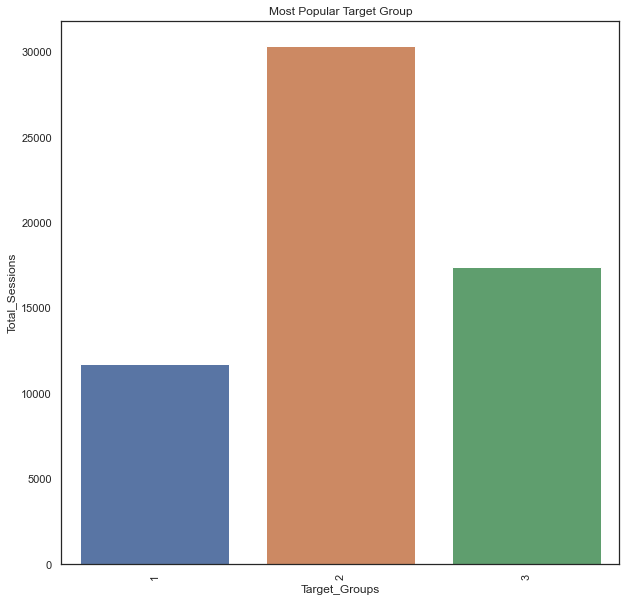

In [95]:
# Create a visulisation of bar charts 
sns.barplot(
    data=tgd_clean,
    x="Target_Groups",
    y="Total_Sessions",
    palette="deep",).set(title="Most Popular Target Group")
                    
sns.set_style("white")
plt.xticks(rotation=90)

Bar charts make it easy to comapre three different variables. 

Interestingly target group two had the highest number of sessions followed by target group 3. 

## Where do different audient types come from?

### Columbus Audience Distribution

We wanted to see how the spilt of audience changes across different locations

In [96]:
# Filter the data set to receive results from Columbus 
location_columbus = GA_data.loc[GA_data["Location"].isin(["Columbus "])]
location_columbus

,Unnamed: 0,Location,Target_Groups,Campaign,Date,Platform,Ad_Format,Creative_Family,Creative_Version,Total_Sessions,Days_Max_Date,Latest_Report
39,39,Columbus,1,FY23_broker_campaign,2022-10-04,User ID Display,NaN,CloserTwins,MoreLoansAll,9,27,0
42,42,Columbus,2,FY23_broker_campaign,2022-04-21,Domain Display,NaN,CloserTwins,Faceoff,1,193,0
43,43,Columbus,2,FY23_broker_campaign,2022-09-24,User ID Display,NaN,UnfairAdvantage,1099,1,37,0
64,64,Columbus,2,FY23_broker_campaign,2022-10-19,User ID Display,NaN,CloserTwins,MoreLoansAll,4,12,1
73,73,Columbus,2,FY23_broker_campaign,2022-10-23,User ID Display,NaN,UnfairAdvantage,NoDTI,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47447,47448,Columbus,3,NB_Wholesale_Phrase,2022-06-21,Google SEM,CPC,SEM Ads,Change Wholesale,1,132,0
47472,47473,Columbus,2,FY23_broker_campaign,2022-10-18,User ID Display,Single image,UnfairAdvantage,1099,1,13,1
47473,47474,Columbus,1,FY23_broker_campaign,2022-09-22,User ID Display,NaN,CloseFaster,FasterAll,4,39,0
47499,47500,Columbus,3,FY23_change_digital_phase3,2022-04-22,Trade Media,Housingwire,Trade Media Ads,ROS1,1,192,0


In [97]:
# Use group by method again 
columbus_distribution = (
    location_columbus.groupby(["Target_Groups"])[["Total_Sessions"]]
    .agg("sum")
    .reset_index()
)

columbus_distribution

,Target_Groups,Total_Sessions
0,0,1
1,1,3010
2,2,2137
3,3,87


In [98]:
# Clean data set 
cd_clean = columbus_distribution.tail(-1)
cd_clean

,Target_Groups,Total_Sessions
1,1,3010
2,2,2137
3,3,87


[None, None]

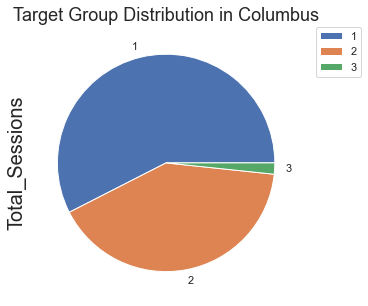

In [99]:
# Plot the pie chart
plot = cd_clean.plot.pie(y='Total_Sessions', figsize=(5, 5))
plot.axes.set_title("Target Group Distribution in Columbus", fontsize=18)
plot.set_ylabel("Total_Sessions",fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.setp(plot.get_legend().get_title(), fontsize='40') 

It was interesting to see the distribution of target groups in Columbus. There was a much higher proportion of website sessions from target group 1 and 2.

### Columbus changing over time

We want to see how this data changed over time to explore further. 

In [100]:
# Change to the correct format 
columbus_distribution['Date'] = pd.to_datetime(columbus_distribution_date['Date'])

In [101]:
# Change to the correct format 
from datetime import datetime as dt

columbus_distribution['Date'] = columbus_distribution['Date'].dt.strftime('%Y-%m')

columbus_distribution

,Target_Groups,Total_Sessions,Date
0,0,1,2022-10
1,1,3010,2022-04
2,2,2137,2022-04
3,3,87,2022-04


In [102]:
# Use loc to get chosen columns 
location_date = GA_data.loc[:, ['Location', 'Date', 'Target_Groups', 'Total_Sessions']]
location_date.head()

,Location,Date,Target_Groups,Total_Sessions
0,Ashburn,2022-08-08,3,1
1,Mebane,2022-06-16,2,1
2,Chicago,2022-06-05,1,2
3,South Jordan,2022-09-02,1,1
4,Potsdam,2022-10-30,2,1


In [103]:
# Prepare for visulisation 
date_columbus = location_date.loc[GA_data["Location"].isin(["Columbus "])]
date_columbus

,Location,Date,Target_Groups,Total_Sessions
39,Columbus,2022-10-04,1,9
42,Columbus,2022-04-21,2,1
43,Columbus,2022-09-24,2,1
64,Columbus,2022-10-19,2,4
73,Columbus,2022-10-23,2,4
...,...,...,...,...
47447,Columbus,2022-06-21,3,1
47472,Columbus,2022-10-18,2,1
47473,Columbus,2022-09-22,1,4
47499,Columbus,2022-04-22,3,1


In [104]:
# Sense check 
date_columbus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 39 to 47517
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location        2014 non-null   object
 1   Date            2014 non-null   object
 2   Target_Groups   2014 non-null   int64 
 3   Total_Sessions  2014 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 78.7+ KB


In [105]:
# Change format
date_columbus['Date'] = pd.to_datetime(date_columbus['Date'])

/var/folders/29/4s1vfd9x6z3btzjk6l3jgxhh0000gn/T/ipykernel_15018/1476384323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_columbus['Date'] = pd.to_datetime(date_columbus['Date'])


In [106]:
# Change format
from datetime import datetime as dt

date_columbus['Date'] = date_columbus['Date'].dt.strftime('%Y-%m')
date_columbus


/var/folders/29/4s1vfd9x6z3btzjk6l3jgxhh0000gn/T/ipykernel_15018/3517325702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_columbus['Date'] = date_columbus['Date'].dt.strftime('%Y-%m')


,Location,Date,Target_Groups,Total_Sessions
39,Columbus,2022-10,1,9
42,Columbus,2022-04,2,1
43,Columbus,2022-09,2,1
64,Columbus,2022-10,2,4
73,Columbus,2022-10,2,4
...,...,...,...,...
47447,Columbus,2022-06,3,1
47472,Columbus,2022-10,2,1
47473,Columbus,2022-09,1,4
47499,Columbus,2022-04,3,1


In [107]:
# Organise columns 
date_columbus_order = date_columbus.sort_values(by='Date')
date_columbus_order.head()

,Location,Date,Target_Groups,Total_Sessions
20603,Columbus,2022-04,2,1
26176,Columbus,2022-04,3,1
17962,Columbus,2022-04,2,2
17824,Columbus,2022-04,3,1
17415,Columbus,2022-04,1,1


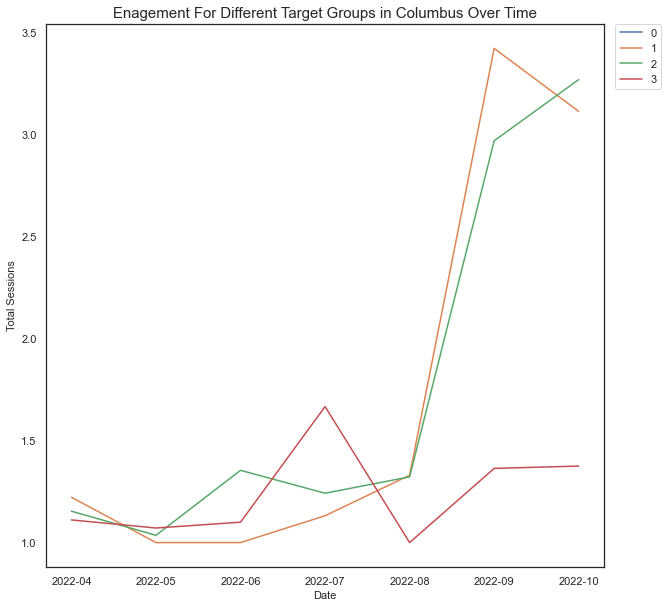

In [108]:
# Create lineplot 
plot = sns.lineplot(
    x="Date",
    y="Total_Sessions",
    hue="Target_Groups",
    data=date_columbus_order,
    palette="deep",
    ci=None)

plot.axes.set_title("Enagement For Different Target Groups in Columbus Over Time",fontsize=15)
plot.set_xlabel("Date",fontsize=11)
plot.set_ylabel("Total Sessions",fontsize=11)
plt.ticklabel_format(style="plain", axis="y")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
sns.set_theme(style='white')


It is interesting to see how there is a spike in engagement from Columbus during a certain time in August 2022. We found that during this time a new policy was proposed by the Columbus government in which the government put forward a new 200 million pound bond package to support social housing in the city. The government would be able to use bond dealers with a social purpose such as Change Wholesale to distribute these funds. Hence the spike in interest from brokers in Change Wholesale. 

https://eu.dispatch.com/story/news/local/2022/11/09/columbus-voters-approving-affordable-housing-infrastructure-bonds/69605995007/

### Engagement changing across top locations

We wanted to see the spike in enagagement from Columbus compared to other locations. 

In [109]:
# Select data
date_top_locations = location_date.loc[GA_data["Location"].isin(["Columbus ", "Los Angeles ", "New York ", "Chicago", "Mebane ", "Anaheim ", "Phoenix "])]
date_top_locations

,Location,Date,Target_Groups,Total_Sessions
1,Mebane,2022-06-16,2,1
13,Los Angeles,2022-04-28,2,1
21,Los Angeles,2022-06-28,2,1
39,Columbus,2022-10-04,1,9
42,Columbus,2022-04-21,2,1
...,...,...,...,...
47496,Anaheim,2022-09-12,1,1
47499,Columbus,2022-04-22,3,1
47514,Mebane,2022-10-06,2,1
47516,New York,2022-06-25,2,1


In [110]:
# convert data
date_top_locations['Date'] = pd.to_datetime(date_top_locations['Date'])

/var/folders/29/4s1vfd9x6z3btzjk6l3jgxhh0000gn/T/ipykernel_15018/2879869881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_top_locations['Date'] = pd.to_datetime(date_top_locations['Date'])


In [111]:
# find correct format for data 
from datetime import datetime as dt

date_top_locations['Date'] = date_top_locations['Date'].dt.strftime('%Y-%m')
date_top_locations

/var/folders/29/4s1vfd9x6z3btzjk6l3jgxhh0000gn/T/ipykernel_15018/3233921351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_top_locations['Date'] = date_top_locations['Date'].dt.strftime('%Y-%m')


,Location,Date,Target_Groups,Total_Sessions
1,Mebane,2022-06,2,1
13,Los Angeles,2022-04,2,1
21,Los Angeles,2022-06,2,1
39,Columbus,2022-10,1,9
42,Columbus,2022-04,2,1
...,...,...,...,...
47496,Anaheim,2022-09,1,1
47499,Columbus,2022-04,3,1
47514,Mebane,2022-10,2,1
47516,New York,2022-06,2,1


In [112]:
# Group data
top_location_date_sum = (
    date_top_locations.groupby(["Location", "Date"])[["Total_Sessions"]]
    .agg("sum")
    .reset_index()
)

top_location_date_sum

,Location,Date,Total_Sessions
0,Anaheim,2022-04,4
1,Anaheim,2022-05,40
2,Anaheim,2022-06,26
3,Anaheim,2022-07,48
4,Anaheim,2022-08,86
5,Anaheim,2022-09,233
6,Anaheim,2022-10,272
7,Columbus,2022-04,36
8,Columbus,2022-05,59
9,Columbus,2022-06,96


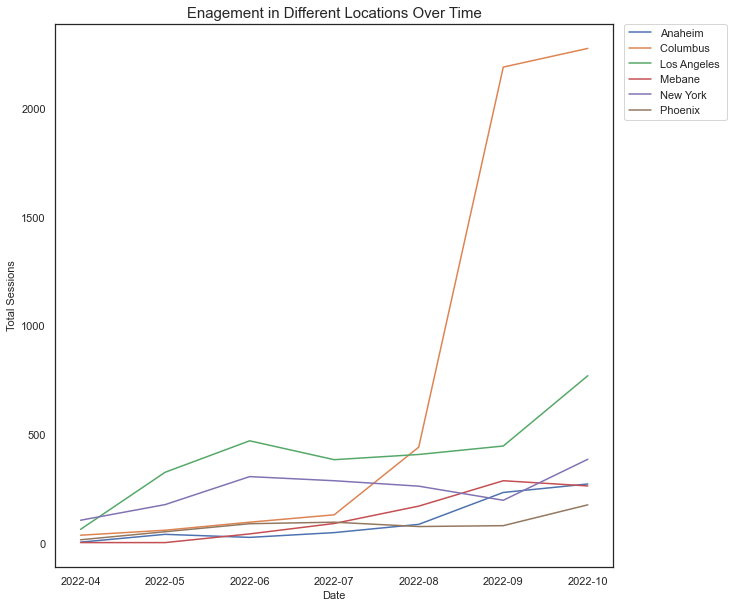

In [113]:
# Create a lineplot 
plot = sns.lineplot(
    x="Date",
    y="Total_Sessions",
    hue="Location",
    data=top_location_date_sum,
    ci=None)
    
plot.axes.set_title("Enagement in Different Locations Over Time" ,fontsize=15)
plot.set_xlabel("Date",fontsize=11)
plot.set_ylabel("Total Sessions",fontsize=11)
plt.ticklabel_format(style="plain", axis="y")
plt.ticklabel_format(style="plain", axis="y")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

You can see the extent to which enagagement spikes in Columbus compared to other locations. 

## Final visulisation to compare different target groups in different locations

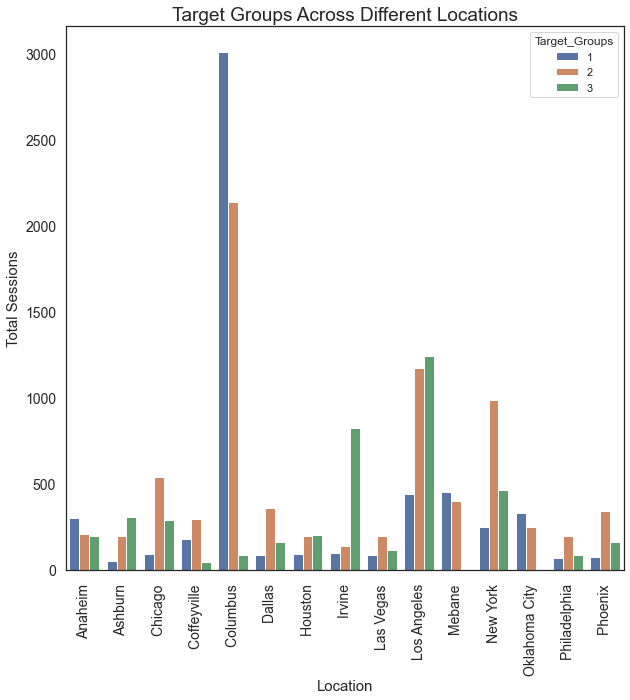

In [114]:
# Create a visulisation of bar charts 

plot = sns.barplot(
    data=tgd_top_clean,
    x="Location",
    y="Total_Sessions",
    hue="Target_Groups",
    palette="deep")

plot.axes.set_title("Target Groups Across Different Locations" ,fontsize=19)
plot.set_xlabel("Location",fontsize=15)
plot.set_ylabel("Total Sessions",fontsize=15)                   
sns.set_style("white")
plt.xticks(rotation=90)
plot.tick_params(labelsize=14)

This gives us an indication of where Change Wholesale should be directing its marketing strategies. We see for example more of target group 3 is found in Los Angeles. There is potentially more opporunity to reach out to new brokers here.  